## Semiconductor Device Experiment - Part1 Resistor 1kOhm

### Load Libraries

In [58]:
# For scientific computing
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
from scipy.special import factorial
from matplotlib.gridspec import GridSpec

# For plotting
import matplotlib.pyplot as plt

### Read data
Read 3 columns of data; VE is power supply voltage, V is measured voltage of resistor, I is measure current through the resistor.
Sometimes, reading fails on the different operating system that encodes different scheme (especially PC that has been purchased aborad) so I encode with utf-8 to ensure the system can read our data without failure.

In [59]:
# you can either enter 1kOhm or 10kOhm
chosenR = "1kOhm"

#global string for labelling
labelx = "current (mA)"
labely = "voltage (V)"

VE, V, I = np.genfromtxt(f"data/2020-10-06-{chosenR}Resistor10mALimit.csv", delimiter=',', 
                            unpack=True, skip_header=1, encoding='utf_8_sig')

print(f"VE = {VE} V")
print(f"V = {V} V")
print(f"I = {I} mA")
print()

VE = [ 0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   10.06] V
V = [-0.1    0.988  1.975  2.96   3.95   4.94   5.94   6.92   7.91   8.89
  9.89   9.94 ] V
I = [-0.12  1.    2.01  3.01  4.01  5.01  6.03  7.03  8.04  9.05 10.07 10.13] mA



### Plotting the Raw data and Perform Least Square Fit (Old)
Plot both Raw data and Fitted line
We used numpy.polyfit that does Linear least-square fitting

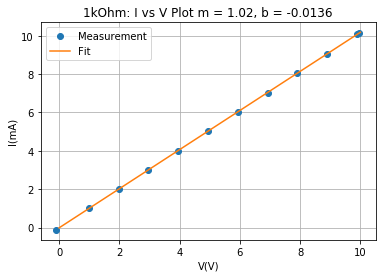

 m = 1.02, b = -0.0136
Resistance from the slope m is R = 0.981 kOhm


In [60]:
def linearFunc(m ,b, x):
    return m * x + b

# raw plotting
plt.plot(V,I, "o", label="Measurement")

# fitting
m,b = np.polyfit(V, I, 1)
VFit = np.linspace(0, np.ceil(np.max(V)), 100)
IFit = m * VFit + b
plt.plot(VFit, IFit, label="Fit")

#configuring
plt.title(f'{chosenR}: I vs V Plot m = {m:.3}, b = {b:.3}')
plt.xlabel('V(V)')
plt.ylabel('I(mA)')
plt.grid(which='major', axis='both')
plt.legend()
plt.show()

# best fit paramters and chi-square
print(f" m = {m:.3}, b = {b:.3}")

# in-progress, compute interpolation?
chi_square = 0
for i in range(I.size):
    residual = (I[i] - linearFunc(m, b, V[i]))
    chi_square += residual ** 2
#print(f" chi sqaure = {chi_square: .3}")

# obtained resistance
R = 1/m
print(f"Resistance from the slope m is R = {R:.3} kOhm")